In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mobile.csv')

In [3]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [4]:
df.sample(5)

,title,ram,brand,url,product_id,listing_id,highlights,availability,selling_price,original_price,currency,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
621,"realme 3i (Diamond Black, 32 GB)",3 GB RAM,realme,https://www.flipkart.com/realme-3i-diamond-bla...,MOBFGYBQ8NKDAMRB,LSTMOBFGYBQ8NKDAMRBKBHLFK,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB ...,COMING_SOON,8499.0,8999.0,INR,4.4,302288,26522,11297,6032,19957,63204,201798
36,"APPLE iPhone SE (Red, 128 GB)",NaN,APPLE,https://www.flipkart.com/apple-iphone-se-red-1...,MOBFWQ6BJTVFKPEJ,LSTMOBFWQ6BJTVFKPEJI0X38M,128 GB ROM 11.94 cm (4.7 inch) Retina HD Displ...,IN_STOCK,27999.0,44900.0,INR,4.5,147617,11610,6092,2212,6270,24817,108226
674,"Alcatel 5V (Spectrum Black, 32 GB)",3 GB RAM,Alcatel,https://www.flipkart.com/alcatel-5v-spectrum-b...,MOBFERH4DYAFX7QZ,LSTMOBFERH4DYAFX7QZLUSK12,3 GB RAM | 32 GB ROM 15.75 cm (6.2 inch) Displ...,COMING_SOON,12999.0,12999.0,INR,4.3,228,49,16,6,14,50,142
221,"REDMI 10 Prime (Phantom Black, 128 GB)",6 GB RAM,REDMI,https://www.flipkart.com/redmi-10-prime-phanto...,MOBG6RGPPXQFYJ4R,LSTMOBG6RGPPXQFYJ4RY4KKXT,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,IN_STOCK,15340.0,16999.0,INR,4.2,2525,187,216,98,214,464,1533
89,"realme Narzo 30 5G (Racing Blue, 128 GB)",6 GB RAM,realme,https://www.flipkart.com/realme-narzo-30-5g-ra...,MOBG3W3GCZ6FN5WJ,LSTMOBG3W3GCZ6FN5WJSSKQ3R,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,IN_STOCK,16999.0,17999.0,INR,4.3,67625,6022,3522,1528,4904,16163,41508


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              847 non-null    object 
 1   ram                746 non-null    object 
 2   brand              847 non-null    object 
 3   url                847 non-null    object 
 4   product_id         847 non-null    object 
 5   listing_id         847 non-null    object 
 6   highlights         847 non-null    object 
 7   availability       847 non-null    object 
 8   selling_price      847 non-null    float64
 9   original_price     847 non-null    float64
 10  currency           847 non-null    object 
 11  avg_rating         847 non-null    float64
 12  ratings_count      847 non-null    int64  
 13  reviews_count      847 non-null    int64  
 14  one_stars_count    847 non-null    int64  
 15  two_stars_count    847 non-null    int64  
 16  three_stars_count  847 non

In [6]:
df.isnull().sum()

title                  0
ram                  101
brand                  0
url                    0
product_id             0
listing_id             0
highlights             0
availability           0
selling_price          0
original_price         0
currency               0
avg_rating             0
ratings_count          0
reviews_count          0
one_stars_count        0
two_stars_count        0
three_stars_count      0
four_stars_count       0
five_stars_count       0
dtype: int64

In [7]:
#dropping out cols that are not required to predict the price:
df.drop(columns=['url','product_id','listing_id','availability','currency'],inplace=True)

In [8]:
df.sample(5)

,title,ram,brand,highlights,selling_price,original_price,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
640,"APPLE iPhone 13 Pro Max (Silver, 256 GB)",NaN,APPLE,256 GB ROM 17.02 cm (6.7 inch) Super Retina XD...,139900.0,139900.0,4.7,878,94,50,6,15,51,756
242,"Itel Vision 2 (Gradation Green, 32 GB)",2 GB RAM,Itel,2 GB RAM | 32 GB ROM 16.76 cm (6.6 inch) Displ...,6899.0,8499.0,3.8,229,23,32,18,30,23,126
230,"APPLE iPhone 13 Mini (Midnight, 128 GB)",NaN,APPLE,128 GB ROM 13.72 cm (5.4 inch) Super Retina XD...,59999.0,69900.0,4.6,437,40,17,6,16,57,341
711,"SAMSUNG Galaxy M42 5G (Prism Dot Gray, 128 GB)",6 GB RAM,SAMSUNG,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,24989.0,24999.0,4.2,1689,162,113,55,116,430,975
209,"Redmi 9A (Nature Green, 32 GB)",3 GB RAM,Mi,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB ...,8085.0,9499.0,4.3,10565,653,547,322,1006,2459,6231


In [9]:
df['brand'].value_counts()

realme              114
SAMSUNG             109
APPLE               101
REDMI                83
Mi                   75
OPPO                 67
vivo                 64
Infinix              44
Tecno                36
POCO                 33
MOTOROLA             26
Itel                 23
Micromax             11
GIONEE               10
Nokia                10
Maplin                9
LAVA                  8
ASUS                  6
Coolpad               4
Alcatel               3
Panasonic             2
MarQ By Flipkart      2
YU                    2
XOLO                  2
TCL                   1
Jmax                  1
KARBONN               1
Name: brand, dtype: int64

In [10]:
#working on 'title' column:
# fetching out mobile models:
df['model'] = df['title'].str.split("(",n=1,expand=True)[0]

In [11]:
df

,title,ram,brand,highlights,selling_price,original_price,avg_rating,ratings_count,reviews_count,one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count,model
0,"POCO C31 (Royal Blue, 64 GB)",4 GB RAM,POCO,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,8999.0,11999.0,4.4,34176,1957,1675,838,2678,6707,22278,POCO C31
1,"POCO C31 (Shadow Gray, 64 GB)",4 GB RAM,POCO,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB ...,8999.0,11999.0,4.4,34176,1957,1675,838,2678,6707,22278,POCO C31
2,"realme C35 (Glowing Green, 64 GB)",4 GB RAM,realme,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB 16...,11999.0,13999.0,4.4,8563,590,590,200,487,1303,5983,realme C35
3,"OPPO K10 (Black Carbon, 128 GB)",6 GB RAM,OPPO,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,14990.0,18999.0,0.0,0,0,0,0,0,0,0,OPPO K10
4,"MOTOROLA G60 (Soft Silver, 128 GB)",6 GB RAM,MOTOROLA,6 GB RAM | 128 GB ROM 17.22 cm (6.78 inch) Ful...,16999.0,21999.0,4.2,85746,8753,7080,2754,6671,19500,49741,MOTOROLA G60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,"OPPO A37f (Black, 16 GB)",2 GB RAM,OPPO,2 GB RAM | 16 GB ROM | Expandable Upto 128 GB ...,9990.0,10990.0,4.2,11537,1952,891,456,1134,2427,6629,OPPO A37f
843,"KARBONN K9 Kavach (Champagne, 16 GB)",2 GB RAM,KARBONN,2 GB RAM | 16 GB ROM | Expandable Upto 32 GB 1...,7490.0,7490.0,4.1,2897,258,294,131,291,451,1730,KARBONN K9 Kavach
844,"OPPO Reno2 (Ocean Blue, 256 GB)",8 GB RAM,OPPO,8 GB RAM | 256 GB ROM | Expandable Upto 256 GB...,39990.0,39990.0,4.4,1648,199,106,41,101,279,1121,OPPO Reno2
845,"SAMSUNG Galaxy A53 (Light Blue, 128 GB)",8 GB RAM,SAMSUNG,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB 1...,35999.0,40999.0,0.0,0,0,0,0,0,0,0,SAMSUNG Galaxy A53


In [12]:
#fetching out colors:
df['color'] = df['title'].str.split("(",n=1,expand=True)[1].str.split(",",n=1,expand=True)[0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              847 non-null    object 
 1   ram                746 non-null    object 
 2   brand              847 non-null    object 
 3   highlights         847 non-null    object 
 4   selling_price      847 non-null    float64
 5   original_price     847 non-null    float64
 6   avg_rating         847 non-null    float64
 7   ratings_count      847 non-null    int64  
 8   reviews_count      847 non-null    int64  
 9   one_stars_count    847 non-null    int64  
 10  two_stars_count    847 non-null    int64  
 11  three_stars_count  847 non-null    int64  
 12  four_stars_count   847 non-null    int64  
 13  five_stars_count   847 non-null    int64  
 14  model              847 non-null    object 
 15  color              847 non-null    object 
dtypes: float64(3), int64(7), o

In [14]:
df['ram'] = df['ram'].str.split(" ",n=1,expand=True)[0]

In [15]:
#filling out missing values in ram:
df['ram'].fillna(df['ram'].mode()[0],inplace=True)

In [16]:
#converting datatype of ram into int:
df['ram'] = df['ram'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              847 non-null    object 
 1   ram                847 non-null    int32  
 2   brand              847 non-null    object 
 3   highlights         847 non-null    object 
 4   selling_price      847 non-null    float64
 5   original_price     847 non-null    float64
 6   avg_rating         847 non-null    float64
 7   ratings_count      847 non-null    int64  
 8   reviews_count      847 non-null    int64  
 9   one_stars_count    847 non-null    int64  
 10  two_stars_count    847 non-null    int64  
 11  three_stars_count  847 non-null    int64  
 12  four_stars_count   847 non-null    int64  
 13  five_stars_count   847 non-null    int64  
 14  model              847 non-null    object 
 15  color              847 non-null    object 
dtypes: float64(3), int32(1), i

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='original_price', ylabel='Density'>

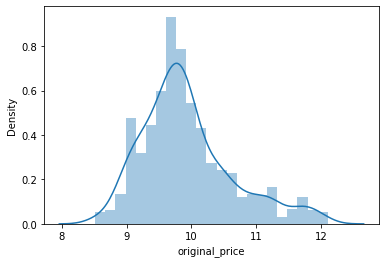

In [19]:
sns.distplot(np.log(df['original_price']))

<function matplotlib.pyplot.show(close=None, block=None)>

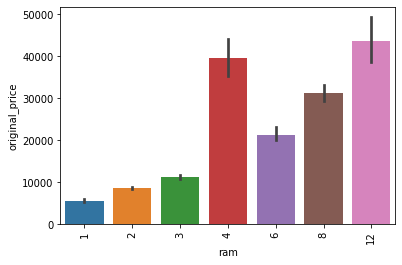

In [20]:
sns.barplot(x=df['ram'], y=df['original_price'])
plt.xticks(rotation='vertical')
plt.show

<AxesSubplot:>

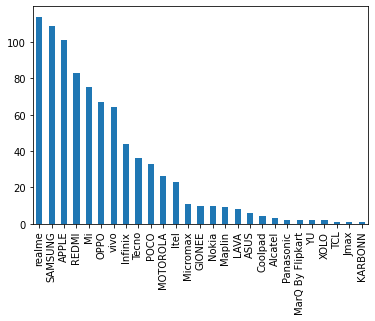

In [21]:
df['brand'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

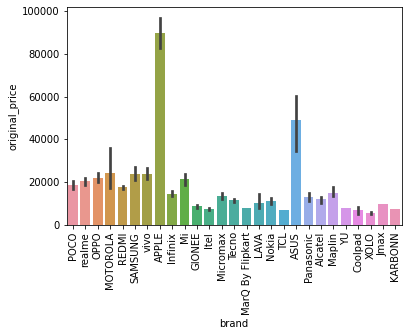

In [22]:
sns.barplot(x=df['brand'], y=df['original_price'])
plt.xticks(rotation='vertical')
plt.show

In [23]:
#extracting other features:
#rom of each smartphone:
temp_df = df['title'].str.split(",",n=2,expand=True)[1]

In [24]:
temp_df = temp_df.str.replace("TB","000")
temp_df = temp_df.str.replace("GB","")
temp_df = temp_df.str.replace(" ","")

In [25]:
temp_df.value_counts()

128)              369
64)               240
32)               135
256)               57
16)                22
512)               12
1000)               5
8)                  4
32)(2RAM)           2
ChocolateBrown      1
Name: 1, dtype: int64

In [26]:
df['rom'] = temp_df.str.split(")",n=2,expand=True)[0]

In [27]:
df['rom'].value_counts()

128               369
64                240
32                137
256                57
16                 22
512                12
1000                5
8                   4
ChocolateBrown      1
Name: rom, dtype: int64

In [28]:
df['rom'].isnull().sum()

0

In [29]:
#fetching the index number:
df[df['rom']=='ChocolateBrown'].index

Int64Index([688], dtype='int64')

In [30]:
df['title'][688]

'XOLO ERA 1X -4G with VoLTE (Gold, Chocolate Brown, 8 GB)'

In [31]:
#replacing chocolatebrown to the mode of ram:
df['rom'] = df['rom'].str.replace("ChocolateBrown",'8')

In [32]:
df['rom'].value_counts()

128     369
64      240
32      137
256      57
16       22
512      12
8         5
1000      5
Name: rom, dtype: int64

In [33]:
#converting to int:
df['rom'] = df['rom'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              847 non-null    object 
 1   ram                847 non-null    int32  
 2   brand              847 non-null    object 
 3   highlights         847 non-null    object 
 4   selling_price      847 non-null    float64
 5   original_price     847 non-null    float64
 6   avg_rating         847 non-null    float64
 7   ratings_count      847 non-null    int64  
 8   reviews_count      847 non-null    int64  
 9   one_stars_count    847 non-null    int64  
 10  two_stars_count    847 non-null    int64  
 11  three_stars_count  847 non-null    int64  
 12  four_stars_count   847 non-null    int64  
 13  five_stars_count   847 non-null    int64  
 14  model              847 non-null    object 
 15  color              847 non-null    object 
 16  rom                847 non

<function matplotlib.pyplot.show(close=None, block=None)>

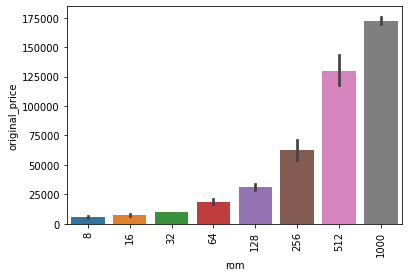

In [35]:
sns.barplot(x=df['rom'], y=df['original_price'])
plt.xticks(rotation='vertical')
plt.show

In [36]:
df['highlights'][55]

'4 GB RAM | 64 GB ROM | Expandable Upto 256 GB 16.54 cm (6.51 inch) HD+ Display 13MP + 2MP + 2MP | 16MP Front Camera 5000 mAh Lithium-ion Polymer Battery MediaTek Helio P35 Processor'

In [37]:
temp_df1 = df['highlights'].str.split("ROM",n=2,expand=True)

In [38]:
temp_df1[1]

0       | Expandable Upto 512 GB 16.59 cm (6.53 inch)...
1       | Expandable Upto 512 GB 16.59 cm (6.53 inch)...
2       | Expandable Upto 1 TB 16.76 cm (6.6 inch) Fu...
3       | Expandable Upto 1 TB 16.74 cm (6.59 inch) F...
4       17.22 cm (6.78 inch) Full HD+ Display 108MP +...
                             ...                        
842     | Expandable Upto 128 GB 12.7 cm (5 inch) HD ...
843     | Expandable Upto 32 GB 12.7 cm (5 inch) HD D...
844     | Expandable Upto 256 GB 16.51 cm (6.5 inch) ...
845     | Expandable Upto 1 TB 16.51 cm (6.5 inch) Fu...
846     | Expandable Upto 128 GB 13.84 cm (5.45 inch)...
Name: 1, Length: 847, dtype: object

In [39]:
#fetching out expandable memory:
df['expandable'] = temp_df1[1].str.replace(" TB","000 GB")

In [40]:
df['expandable'] = df['expandable'].str.split("GB",n=2,expand=True)[0]

In [41]:
df['expandable'] = df['expandable'].str.split(" ",n=4,expand=True)[4]

In [42]:
df['expandable'].isnull().sum()

0

In [43]:
df['expandable'] = df['expandable'].str.split(")",n=2,expand=True)[0]

In [44]:
df['expandable'] = df['expandable'].str.replace("inch",'0')

In [45]:
df['expandable'] = df['expandable'].astype(int)

In [46]:
df['expandable'].value_counts()

0       308
256     211
1000    168
512     105
128      34
32        9
64        8
12        2
2000      1
400       1
Name: expandable, dtype: int64

In [47]:
df['highlights'][5]

'2 GB RAM | 32 GB ROM | Expandable Upto 256 GB 16.51 cm (6.5 inch) HD+ Display 8MP Rear Camera | 5MP Front Camera 5000 mAh Battery MediaTek Helio G35 Processor'

In [48]:
#fetching out size of the phone:
df['size(inch)'] = df['highlights'].str.split("(",n=2,expand=True)[1]

In [49]:
df['size(inch)'] = df['size(inch)'].str.split(" ",n=3,expand=True)[0]

In [50]:
df['size(inch)'].isnull().sum()

0

In [51]:
df['size(inch)'] = df['size(inch)'].astype(float)

In [52]:
df['size(inch)'].value_counts()

6.500     139
6.100      63
6.430      63
6.600      60
6.670      54
6.400      45
6.520      44
6.530      36
6.700      32
6.510      28
5.400      22
6.780      18
6.440      18
6.560      18
5.000      16
5.450      15
6.220      15
6.550      14
6.580      13
4.700      13
6.950      12
6.200      11
6.820      10
6.300      10
6.800       9
6.260       8
5.700       6
5.990       5
6.390       5
6.620       5
6.350       5
5.500       5
6.088       4
5.800       3
5.600       3
6.590       3
5.710       2
6.470       2
7.000       2
6.570       2
5.920       2
6.515       2
6.080       1
6.650       1
66.000      1
6.000       1
5.930       1
Name: size(inch), dtype: int64

In [53]:
df['highlights'][166]

'8 GB RAM | 128 GB ROM | Expandable Upto 1 TB 16.51 cm (6.5 inch) Full HD+ Display 64MP + 2MP + 2MP | 16MP Front Camera 5000 mAh Battery MediaTek Dimensity 810 5G Processor 33 W Charger'

In [54]:
#fetching out rear and front camera details:
camera = df['highlights'].str.split("Display",n=2,expand=True)[1]

In [55]:
camera

0       13MP + 2MP + 2MP | 5MP Front Camera 5000 mAh ...
1       13MP + 2MP + 2MP | 5MP Front Camera 5000 mAh ...
2       50MP + 2MP + 0.3MP | 8MP Front Camera 5000 mA...
3       50MP + 2MP + 2MP | 16MP Front Camera 5000 mAh...
4       108MP + 8MP + 2MP | 32MP Front Camera 6000 mA...
                             ...                        
842     8MP Rear Camera | 5MP Front Camera 2630 mAh B...
843                     5MP Rear Camera 2300 mAh Battery
844     48MP + 8MP + 13MP + 2MP | 16MP Front Camera 4...
845     64MP + 12MP + 5MP + 5MP | 32MP Front Camera 5...
846     13MP Rear Camera | 5MP Front Camera 4000 mAh ...
Name: 1, Length: 847, dtype: object

In [56]:
df['camera'] = camera.str.split("|",n=2,expand=True)[0]

In [57]:
rear = df['camera'].str.split(" ",n=4,expand=True)

In [58]:
df['rear_camera'] = rear[1].str.split("MP",n=2,expand=True)[0]

In [59]:
df['rear_camera'].value_counts()

13     180
48     158
64     145
12     126
50     108
8       43
108     34
16      27
5       19
25       3
2        2
32       2
Name: rear_camera, dtype: int64

In [60]:
df['rear_camera'] = df['rear_camera'].astype(int)

In [61]:
df['rear_camera'].isnull().sum()

0

In [62]:
front = camera.str.split("|",n=2,expand=True)[1]

In [63]:
df['front_camera'] = front.str.split(" ",n=2,expand=True)[1]

In [64]:
df['front_camera'] = df['front_camera'].str.replace("MP","")

In [65]:
df['front_camera'].value_counts()

16    199
8     179
5     123
12     86
32     57
13     41
7      17
20     15
2      11
44      8
50      6
24      6
10      6
25      4
Name: front_camera, dtype: int64

In [66]:
df['front_camera'].isnull().sum()

89

In [67]:
df['front_camera'].fillna(0,inplace=True)

In [68]:
df['front_camera'] = df['front_camera'].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              847 non-null    object 
 1   ram                847 non-null    int32  
 2   brand              847 non-null    object 
 3   highlights         847 non-null    object 
 4   selling_price      847 non-null    float64
 5   original_price     847 non-null    float64
 6   avg_rating         847 non-null    float64
 7   ratings_count      847 non-null    int64  
 8   reviews_count      847 non-null    int64  
 9   one_stars_count    847 non-null    int64  
 10  two_stars_count    847 non-null    int64  
 11  three_stars_count  847 non-null    int64  
 12  four_stars_count   847 non-null    int64  
 13  five_stars_count   847 non-null    int64  
 14  model              847 non-null    object 
 15  color              847 non-null    object 
 16  rom                847 non

In [70]:
#sorting required cols:
#new_df = df[['brand','model','color','ram','rom','expandable','rear_camera','front_camera','size(inch)','original_price']]
new_df = df[['brand','model','color','ram','rom','expandable','rear_camera','front_camera','size(inch)','one_stars_count','two_stars_count','three_stars_count','four_stars_count','five_stars_count','original_price']]

In [71]:
new_df

,brand,model,color,ram,rom,expandable,rear_camera,front_camera,size(inch),one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count,original_price
0,POCO,POCO C31,Royal Blue,4,64,512,13,5,6.53,1675,838,2678,6707,22278,11999.0
1,POCO,POCO C31,Shadow Gray,4,64,512,13,5,6.53,1675,838,2678,6707,22278,11999.0
2,realme,realme C35,Glowing Green,4,64,1000,50,8,6.60,590,200,487,1303,5983,13999.0
3,OPPO,OPPO K10,Black Carbon,6,128,1000,50,16,6.59,0,0,0,0,0,18999.0
4,MOTOROLA,MOTOROLA G60,Soft Silver,6,128,0,108,32,6.78,7080,2754,6671,19500,49741,21999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,OPPO,OPPO A37f,Black,2,16,128,8,5,5.00,891,456,1134,2427,6629,10990.0
843,KARBONN,KARBONN K9 Kavach,Champagne,2,16,32,5,0,5.00,294,131,291,451,1730,7490.0
844,OPPO,OPPO Reno2,Ocean Blue,8,256,256,48,16,6.50,106,41,101,279,1121,39990.0
845,SAMSUNG,SAMSUNG Galaxy A53,Light Blue,8,128,1000,64,32,6.50,0,0,0,0,0,40999.0


In [72]:
new_df.corr()['original_price']

ram                  0.134357
rom                  0.727685
expandable          -0.261760
rear_camera         -0.102670
front_camera         0.171148
size(inch)          -0.053396
one_stars_count     -0.131063
two_stars_count     -0.155033
three_stars_count   -0.153699
four_stars_count    -0.126316
five_stars_count    -0.079585
original_price       1.000000
Name: original_price, dtype: float64

<AxesSubplot:>

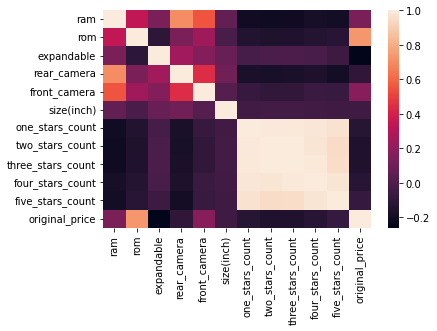

In [73]:
sns.heatmap(new_df.corr())

In [74]:
X = new_df.iloc[:,:-1]
y = np.log(new_df['original_price'])

In [75]:
X

,brand,model,color,ram,rom,expandable,rear_camera,front_camera,size(inch),one_stars_count,two_stars_count,three_stars_count,four_stars_count,five_stars_count
0,POCO,POCO C31,Royal Blue,4,64,512,13,5,6.53,1675,838,2678,6707,22278
1,POCO,POCO C31,Shadow Gray,4,64,512,13,5,6.53,1675,838,2678,6707,22278
2,realme,realme C35,Glowing Green,4,64,1000,50,8,6.60,590,200,487,1303,5983
3,OPPO,OPPO K10,Black Carbon,6,128,1000,50,16,6.59,0,0,0,0,0
4,MOTOROLA,MOTOROLA G60,Soft Silver,6,128,0,108,32,6.78,7080,2754,6671,19500,49741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,OPPO,OPPO A37f,Black,2,16,128,8,5,5.00,891,456,1134,2427,6629
843,KARBONN,KARBONN K9 Kavach,Champagne,2,16,32,5,0,5.00,294,131,291,451,1730
844,OPPO,OPPO Reno2,Ocean Blue,8,256,256,48,16,6.50,106,41,101,279,1121
845,SAMSUNG,SAMSUNG Galaxy A53,Light Blue,8,128,1000,64,32,6.50,0,0,0,0,0


In [76]:
y

0       9.392579
1       9.392579
2       9.546741
3       9.852142
4       9.998752
         ...    
842     9.304741
843     8.921324
844    10.596385
845    10.621303
846     8.987072
Name: original_price, Length: 847, dtype: float64

## Building the model

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

## Linear Regression

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  -122151497.43793292
MAE:  2232.244946543093


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Ridge

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = Ridge(alpha=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.8166791083461162
MAE:  0.21440529728527621


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Lasso

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = Lasso(alpha=0.0001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.8739247141493984
MAE:  0.11859344173265711


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.105e+00, tolerance: 3.253e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## KNN

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2Score:  0.9087113984669531
MAE:  0.09835009733720977


## Decision Tree

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=230)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.8949847660588706
MAE:  0.0780712858919719


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Random Forest

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=5, max_samples=0.5, max_features=0.80, max_depth=30)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.9251826331937317
MAE:  0.11280897552703091


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Gradient Boosting Regressor

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=300)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.9233238643555648
MAE:  0.10621525617051525


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Adaboost Regressor

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = AdaBoostRegressor(learning_rate=0.05, n_estimators=200)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.8631100933263217
MAE:  0.19152353336408168


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## SVR

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = SVR(C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.5756812709164192
MAE:  0.2961779441096583


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## XGB

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=200, learning_rate=0.15, max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2Score:  0.9367581269819607
MAE:  0.06690592301402105


C:\Users\Neeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Exporting the model

In [91]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(new_df,open('df.pkl','wb'))